In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 데이터 준비하기

In [2]:
df = pd.read_csv('https://github.com/MLSLab/Lecture_SPT3076/raw/main/data/admission_basedon_exam_scores.csv')

In [3]:
df

,Exam 1 marks,Exam 2 marks,Admission status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [4]:
df_admitted = df[df['Admission status'] == 1]

In [5]:
df_admitted.head(3)

,Exam 1 marks,Exam 2 marks,Admission status
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1


In [6]:
df_notadmitted = df[df['Admission status'] == 0]

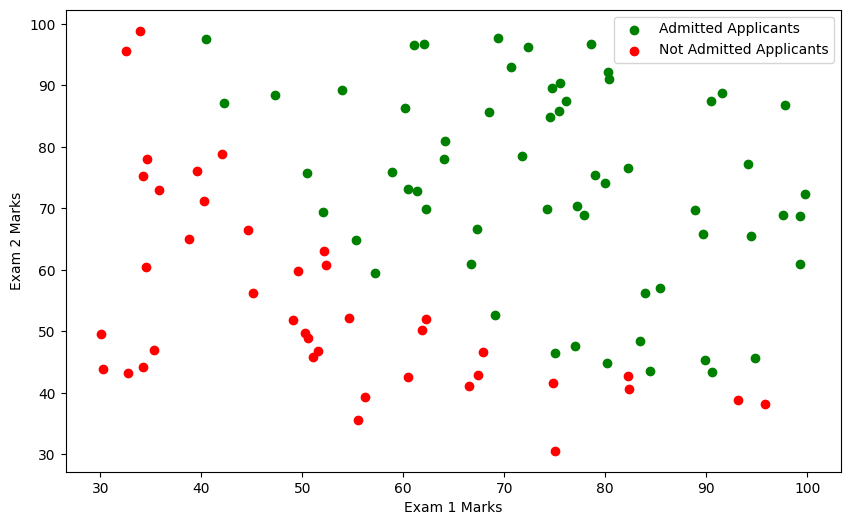

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(df_admitted['Exam 1 marks'], df_admitted['Exam 2 marks'], color= 'green', label= 'Admitted Applicants')
plt.scatter(df_notadmitted['Exam 1 marks'], df_notadmitted['Exam 2 marks'], color= 'red', label= 'Not Admitted Applicants')
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')
#plt.title(title)
plt.legend()
plt.show()

In [8]:
X = df[['Exam 1 marks', 'Exam 2 marks']]
y = df['Admission status']

### Train / test split

In [9]:
from sklearn import model_selection 

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state= 1)

In [11]:
X_train.shape

(80, 2)

### 학습하기

In [12]:
from sklearn import svm

In [33]:
clf = svm.SVC(kernel='linear', C=1000)

In [34]:
clf.fit(X_train, y_train)

SVC(C=1000, kernel='linear')

### 테스트 해보기

In [40]:
clf.score(X_test, y_test)

0.9

### Decision boundary 그려보기

In [36]:
def plot_support_vector(classifier):
    """
    To plot decsion boundary and margin. Code taken from Sklearn documentation.

    I/P
    ----------
    classifier : SVC object for each type of kernel

    O/P
    -------
    Plot
    
    """
    clf =classifier
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')  

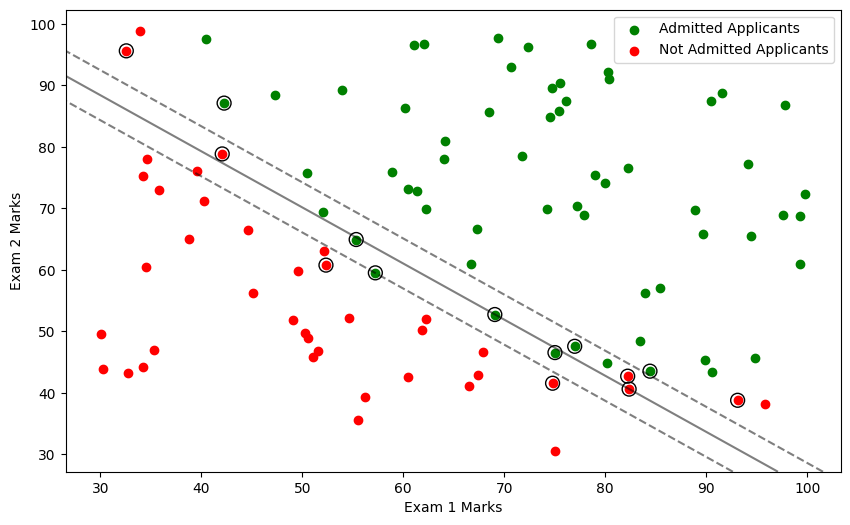

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(df_admitted['Exam 1 marks'], df_admitted['Exam 2 marks'], color= 'green', label= 'Admitted Applicants')
plt.scatter(df_notadmitted['Exam 1 marks'], df_notadmitted['Exam 2 marks'], color= 'red', label= 'Not Admitted Applicants')
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')
#plt.title(title)
plt.legend()

plot_support_vector(clf)
plt.show()